In [2]:
import tools as tools
import numpy as np
from itertools import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [3]:
sns.set_style('dark', {'axes.grid':True, 'axes.edgecolor':'black', 'font.family':['serif'],'font.serif':['Roman'],
                       'xtixks.bottom':True, 'ytick.left':True})

# PART A

In [33]:
varVals = np.load('parta_TransVar.npz')
print(varVals.files)


['trans_variance']


In [34]:
var = varVals['trans_variance']
varSteps = np.arange(0, var.shape[0])*100
analytical = np.ones(var.shape[0])

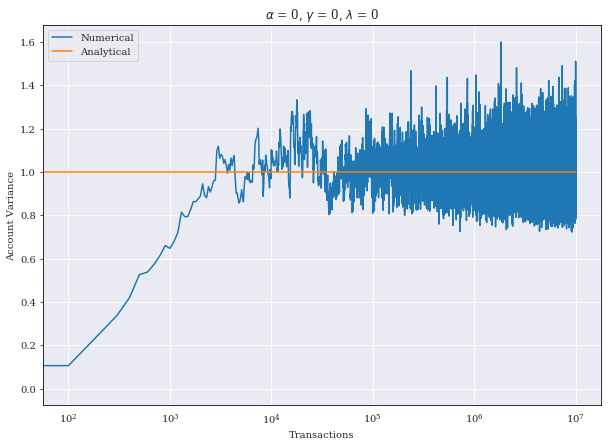

In [64]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, var, label = 'Numerical')
ax.semilogx(varSteps, analytical, label = 'Analytical')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')

plt.show()

LOOKS LIKE 10^5 GIVES BEST RESULTS

In [84]:
binVals = np.load('parta_BinVals.npz')
binParams = np.load('parta_BinParams.npz')
print(binVals.files)
print(binParams.files)

['final_dist', 'error_vals', 'all_vals']
['binSize', 'binMax', 'binNumber', 'binSteps']


In [85]:
mc_steps = 1e4
agents = 500
m0 = 1000
binSize = binParams['binSize']
binCounts = binVals['final_dist']
errorVec = binVals['error_vals']
binX = binParams['binSteps']/m0
errorX = np.arange(0, mc_steps)
plotBins = binCounts/mc_steps/agents*m0/binSize

In [86]:
# finding analytical vals
from scipy.special import gamma
lam = 0
apl = 0
gam = 0

n = 1 + 3.0*lam/(1 - lam)
a = n**n / gamma(n)
analytic = a*binX**(n-1)*np.exp(-n*binX)

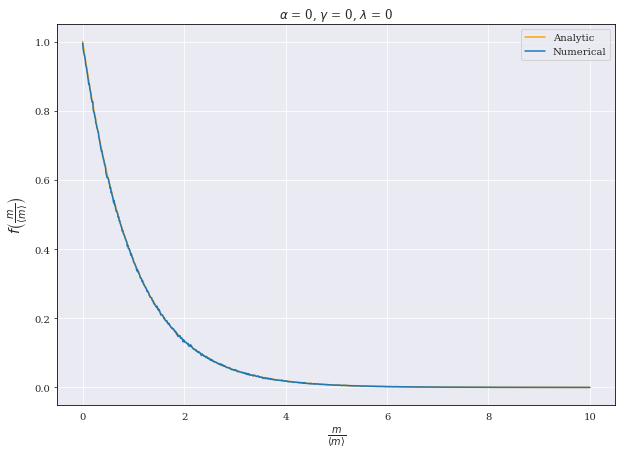

In [87]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(binX, analytic, label = 'Analytic', color = 'orange')
ax.plot(binX, plotBins, label = 'Numerical', c='C0')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()


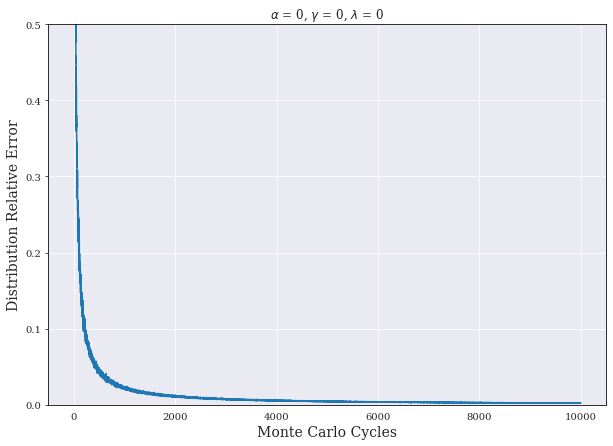

In [72]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(errorX[:-1], errorVec)
ax.set_ylim(0,.5)
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Monte Carlo Cycles', fontsize = 14)
ax.set_ylabel('Distribution Relative Error', fontsize = 14)

plt.show()

# PART B

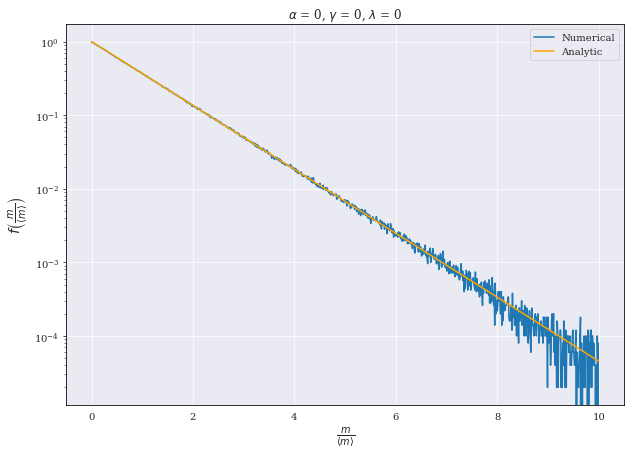

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
ax.semilogy(binX, plotBins, label = 'Numerical', c='C0')
ax.semilogy(binX, analytic, label = 'Analytic', color = 'orange')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

# PART C

Check variances to see when we have enough transactions

In [41]:
var25 = np.load('partc_25_TransVar.npz')
var5 = np.load('partc_5_TransVar.npz')
var9 = np.load('partc_9_TransVar.npz')
var25vec = var25['trans_variance']
var5vec = var5['trans_variance']
var9vec = var9['trans_variance']


In [43]:
var25analytic = np.ones(var25vec.shape[0])*((1+3.0*0.25/(1-0.25))**(-1))
var5analytic = np.ones(var5vec.shape[0])*((1+3.0*0.5/(1-0.5))**(-1))
var9analytic = np.ones(var9vec.shape[0])*((1+3.0*0.9/(1-0.9))**(-1))
varSteps = np.arange(0, var25vec.shape[0])*100


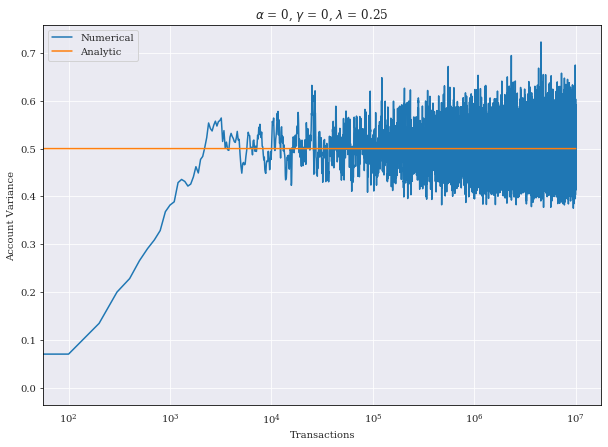

In [48]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, var25vec, label = 'Numerical')
ax.semilogx(varSteps, var25analytic, label = 'Analytic')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0.25')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

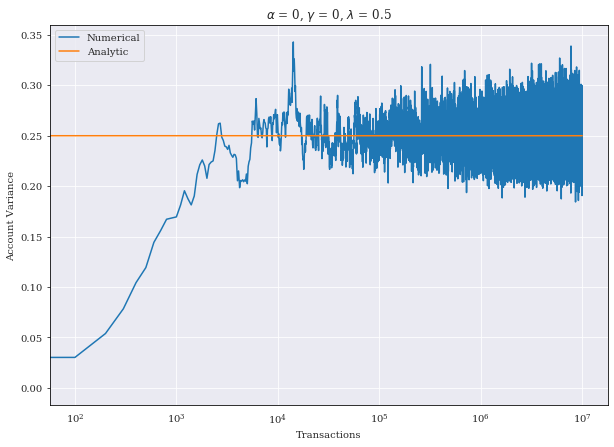

In [49]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, var5vec, label = 'Numerical')
ax.semilogx(varSteps, var5analytic, label = 'Analytic')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0.5')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

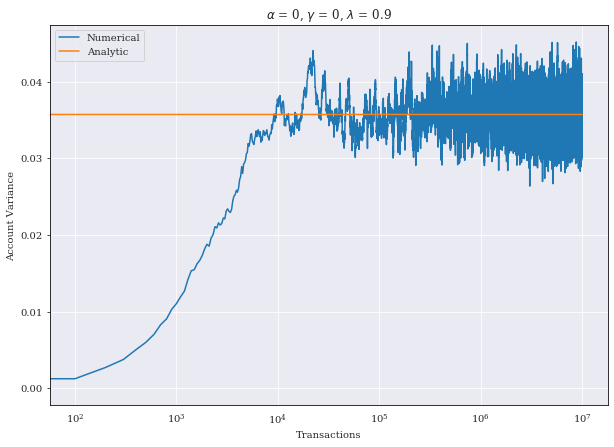

In [50]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, var9vec, label = 'Numerical')
ax.semilogx(varSteps, var9analytic, label = 'Analytic')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0.9')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

AGAIN 10^5 SHOULD BE GOOD

In [140]:
binVals9 = np.load('partc_9_BinVals.npz')
binParams9 = np.load('partc_9_BinParams.npz')
binVals5 = np.load('partc_5_BinVals.npz')
binParams5 = np.load('partc_5_BinParams.npz')
binVals25 = np.load('partc_25_BinVals.npz')
binParams25 = np.load('partc_25_BinParams.npz')


In [141]:
mc_steps = 1e4
agents = 500
m0 = 1000
binSize = binParams9['binSize']
binX = binParams['binSteps']/m0

binCounts9 = binVals9['final_dist']
errorVec9 = binVals9['error_vals']
errorX9 = np.arange(0, mc_steps)
binCounts5 = binVals5['final_dist']
binCounts25 = binVals25['final_dist']


plotBins9 = binCounts9/mc_steps/agents*m0/binSize
plotBins5 = binCounts5/mc_steps/agents*m0/binSize
plotBins25 = binCounts25/mc_steps/agents*m0/binSize

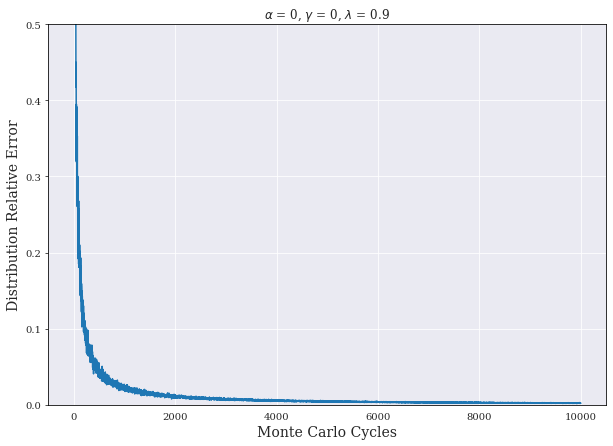

In [79]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(errorX9[:-1], errorVec9)
ax.set_ylim(0,.5)
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0.9')
ax.set_xlabel('Monte Carlo Cycles', fontsize = 14)
ax.set_ylabel('Distribution Relative Error', fontsize = 14)

plt.show()

ERROR FOR LAMBDA = 0.9. LOOKS LIKE IT CONVERGES WELL

In [80]:
# finding analytical vals
from scipy.special import gamma
lam = 0.9
apl = 0
gam = 0

n = 1 + 3.0*lam/(1 - lam)
a = n**n / gamma(n)
analytic9 = a*binX**(n-1)*np.exp(-n*binX)

In [81]:
lam = 0.5
apl = 0
gam = 0

n = 1 + 3.0*lam/(1 - lam)
a = n**n / gamma(n)
analytic5 = a*binX**(n-1)*np.exp(-n*binX)

In [82]:
lam = 0.25
apl = 0
gam = 0

n = 1 + 3.0*lam/(1 - lam)
a = n**n / gamma(n)
analytic25 = a*binX**(n-1)*np.exp(-n*binX)

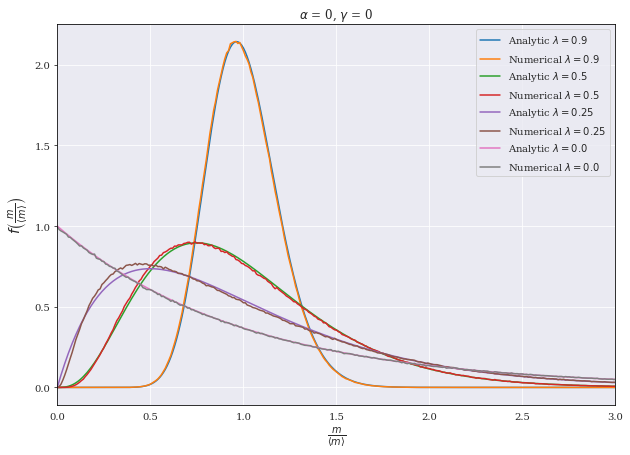

In [90]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(binX, analytic9, label = r'Analytic $\lambda = 0.9$')
ax.plot(binX, plotBins9, label = r'Numerical $\lambda = 0.9$')
ax.plot(binX, analytic5, label = r'Analytic $\lambda = 0.5$')
ax.plot(binX, plotBins5, label = r'Numerical $\lambda = 0.5$')
ax.plot(binX, analytic25, label = r'Analytic $\lambda = 0.25$')
ax.plot(binX, plotBins25, label = r'Numerical $\lambda = 0.25$')
ax.plot(binX, analytic, label = r'Analytic $\lambda = 0.0$')
ax.plot(binX, plotBins, label = r'Numerical $\lambda = 0.0$')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.set_xlim(0,3)
ax.legend(loc = 'upper right')
plt.show()

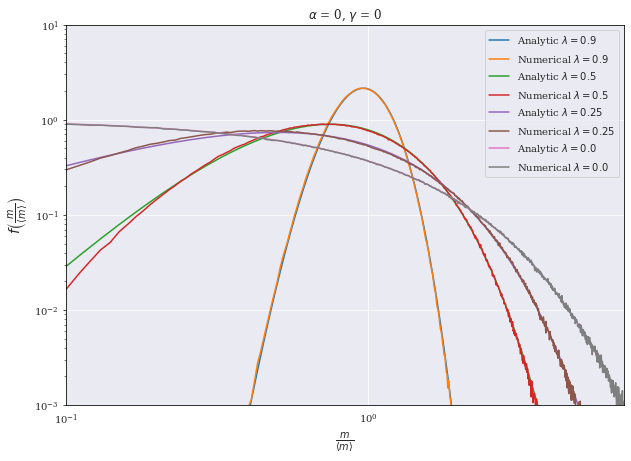

In [106]:
fig, ax = plt.subplots(figsize=(10,7))
ax.loglog(binX, analytic9, label = r'Analytic $\lambda = 0.9$')
ax.loglog(binX, plotBins9, label = r'Numerical $\lambda = 0.9$')
ax.loglog(binX, analytic5, label = r'Analytic $\lambda = 0.5$')
ax.loglog(binX, plotBins5, label = r'Numerical $\lambda = 0.5$')
ax.loglog(binX, analytic25, label = r'Analytic $\lambda = 0.25$')
ax.loglog(binX, plotBins25, label = r'Numerical $\lambda = 0.25$')
ax.loglog(binX, analytic, label = r'Analytic $\lambda = 0.0$')
ax.loglog(binX, plotBins, label = r'Numerical $\lambda = 0.0$')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
ax.set_xlim(1*1e-1,7*1e0)
ax.set_ylim(1e-3, 1e1)
plt.show()

In [108]:
print(binX.shape)

(1000,)


TAIL BEHAVIOR

In [143]:
from scipy.optimize import curve_fit

def powerlaw( x, a, b):
    return a*x**(1-b)

popt9, pcov9 = curve_fit(powerlaw, binX[170:200], plotBins9[170:200])
popt5, pcov5 = curve_fit(powerlaw, binX[250:350], plotBins5[250:350])
popt25, pcov25 = curve_fit(powerlaw, binX[320:470], plotBins25[320:470])

err9 = np.sum((powerlaw(binX, popt9[0], popt9[1])[800:960] - plotBins9[800:960])**2)
err5 = np.sum((powerlaw(binX, popt5[0], popt5[1])[800:960] - plotBins5[800:960])**2)
err25 = np.sum((powerlaw(binX, popt25[0], popt25[1])[800:960] - plotBins25[800:960])**2)

print(err9)
print(err5)
print(err25)


9.366694038585104e-35
2.053382575412561e-10
1.7923936165854204e-07


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


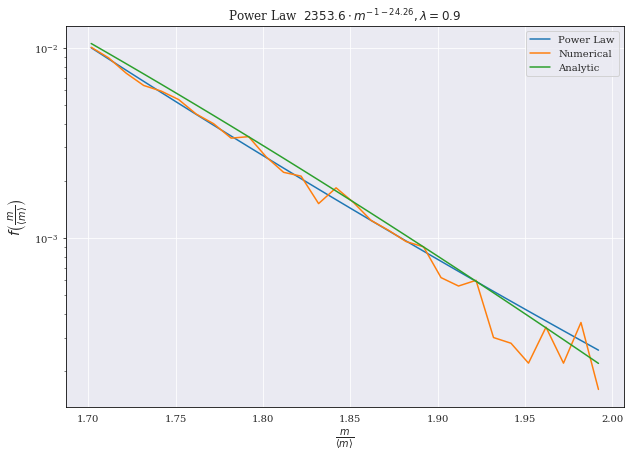

In [126]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[170:200], powerlaw(binX, popt9[0], popt9[1])[170:200], label = 'Power Law')
ax.semilogy(binX[170:200], plotBins9[170:200], label = 'Numerical')
ax.semilogy(binX[170:200], analytic9[170:200], label = 'Analytic')
ax.set_title("Power Law  $%.1f \cdot m^{-1-%.2f}, \lambda = 0.9$" %(popt9[0],popt9[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


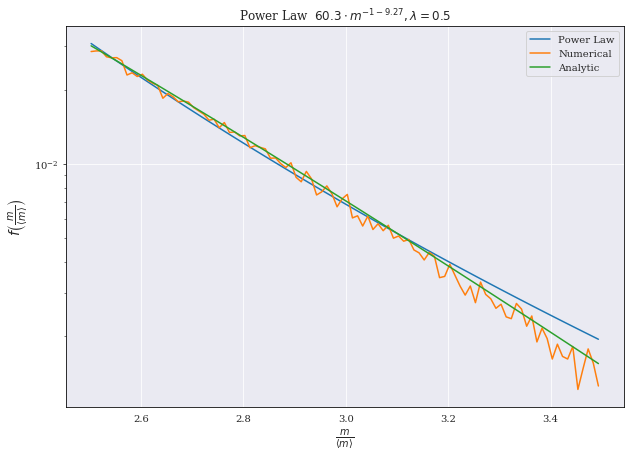

In [133]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[250:350], powerlaw(binX, popt5[0], popt5[1])[250:350], label = 'Power Law')
ax.semilogy(binX[250:350], plotBins5[250:350], label = 'Numerical')
ax.semilogy(binX[250:350], analytic5[250:350], label = 'Analytic')
ax.set_title("Power Law  $%.1f \cdot m^{-1-%.2f}, \lambda = 0.5$" %(popt5[0],popt5[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


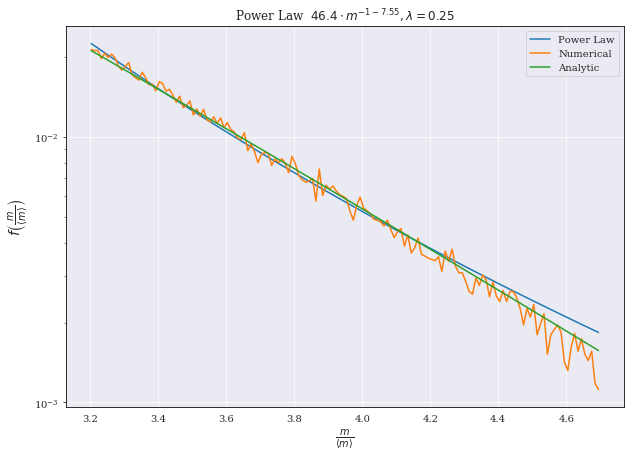

In [134]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[320:470], powerlaw(binX, popt25[0], popt25[1])[320:470], label = 'Power Law')
ax.semilogy(binX[320:470], plotBins25[320:470], label = 'Numerical')
ax.semilogy(binX[320:470], analytic25[320:470], label = 'Analytic')
ax.set_title("Power Law  $%.1f \cdot m^{-1-%.2f}, \lambda = 0.25$" %(popt25[0],popt25[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

# PART D

In [32]:
var2 = np.load('partd_1000_20_var_TransVar.npz')
var15 = np.load('partd_1000_15_var_TransVar.npz')
varPlot2 = var2['trans_variance']
varPlot15 = var15['trans_variance']
varSteps = np.arange(0, varPlot2.shape[0])*100

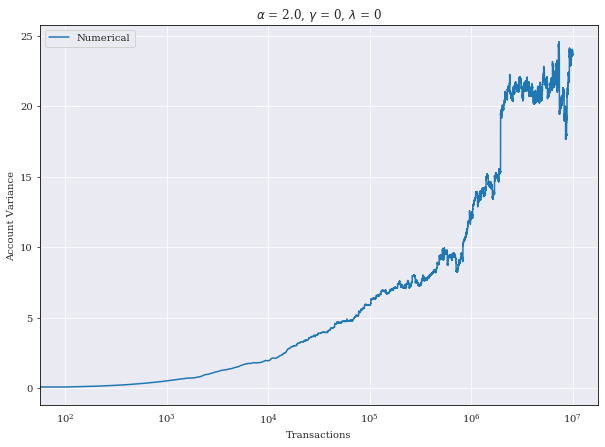

In [35]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, varPlot2, label = 'Numerical')
ax.set_title(r'$\alpha$ = 2.0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

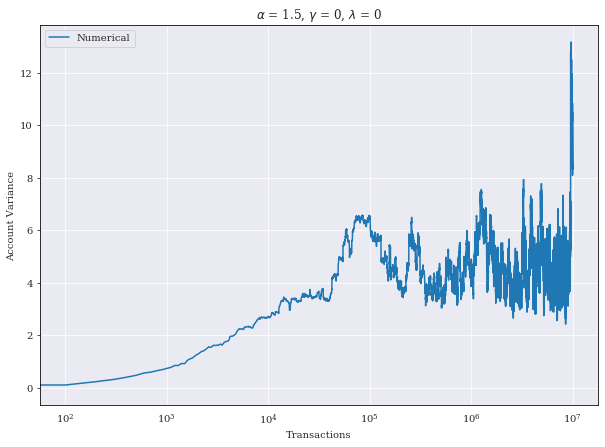

In [36]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, varPlot15, label = 'Numerical')
ax.set_title(r'$\alpha$ = 1.5, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

In [43]:
binVals_1000_0_20 = np.load('partd_1000_0_20_BinVals.npz')
binVals_1000_0_15 = np.load('partd_1000_0_15_BinVals.npz')
binVals_1000_0_10 = np.load('partd_1000_0_10_BinVals.npz')
binVals_1000_0_05 = np.load('partd_1000_0_05_BinVals.npz')

binParams = np.load('partd_1000_0_20_BinParams.npz')


In [44]:
#for alpha = 2.0 had to se Mc = 1e3 and transactions = 1e6
#rest MC = 1e4 and transactions = 1e5
mc_steps0 = 1e3
mc_steps = 1e4
agents = 1000
m0 = 1000
binSize = binParams['binSize']
binX = binParams['binSteps']/m0

binCounts_1000_0_20 = binVals_1000_0_20['final_dist']
binCounts_1000_0_15 = binVals_1000_0_15['final_dist']
binCounts_1000_0_10 = binVals_1000_0_10['final_dist']
binCounts_1000_0_05 = binVals_1000_0_05['final_dist']
errorVec_1000_0_20 = binVals_1000_0_20['error_vals']
errorX_1000_0_20 = np.arange(0, mc_steps0)

plotBins_1000_0_20 = binCounts_1000_0_20/mc_steps0/agents*m0/binSize
plotBins_1000_0_15 = binCounts_1000_0_15/mc_steps/agents*m0/binSize
plotBins_1000_0_10 = binCounts_1000_0_10/mc_steps/agents*m0/binSize
plotBins_1000_0_05 = binCounts_1000_0_05/mc_steps/agents*m0/binSize

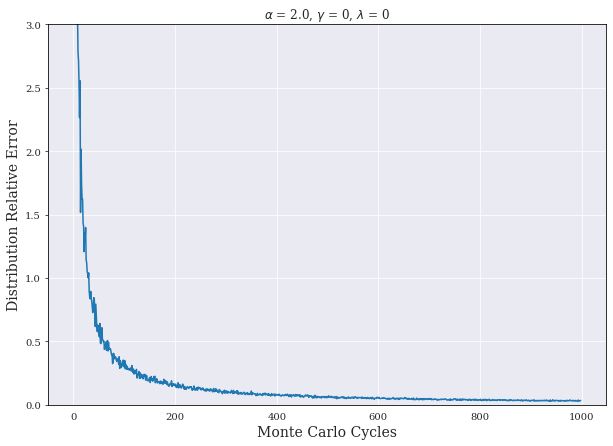

In [43]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(errorX_1000_0_20[:-1], errorVec_1000_0_20)
ax.set_ylim(0,3)
ax.set_title(r'$\alpha$ = 2.0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Monte Carlo Cycles', fontsize = 14)
ax.set_ylabel('Distribution Relative Error', fontsize = 14)

plt.show()

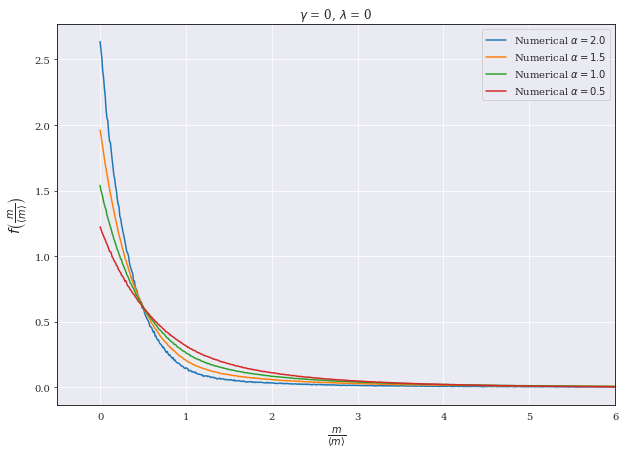

In [54]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(binX, plotBins_1000_0_20, label = r'Numerical $\alpha = 2.0$')
ax.plot(binX, plotBins_1000_0_15, label = r'Numerical $\alpha = 1.5$')
ax.plot(binX, plotBins_1000_0_10, label = r'Numerical $\alpha = 1.0$')
ax.plot(binX, plotBins_1000_0_05, label = r'Numerical $\alpha = 0.5$')
ax.set_title(r'$\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.set_xlim(-0.5,6)
ax.legend(loc = 'upper right')
plt.show()

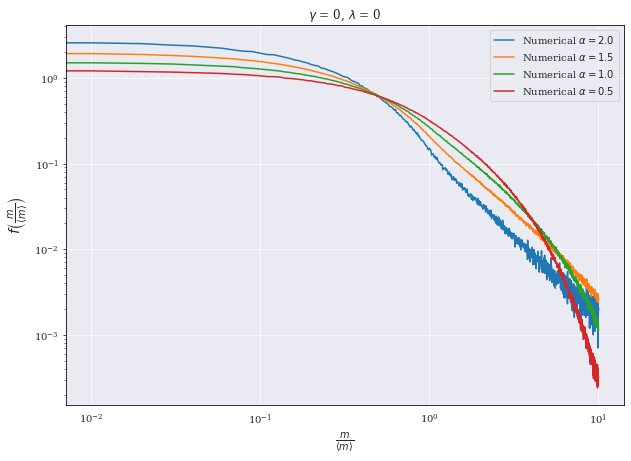

In [45]:
fig, ax = plt.subplots(figsize=(10,7))
ax.loglog(binX, plotBins_1000_0_20, label = r'Numerical $\alpha = 2.0$')
ax.loglog(binX, plotBins_1000_0_15, label = r'Numerical $\alpha = 1.5$')
ax.loglog(binX, plotBins_1000_0_10, label = r'Numerical $\alpha = 1.0$')
ax.loglog(binX, plotBins_1000_0_05, label = r'Numerical $\alpha = 0.5$')
ax.set_title(r'$\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)

ax.legend(loc = 'upper right')
plt.show()

Do power law stuff

In [137]:
##### from scipy.optimize import curve_fit

def powerlaw( x, a, b):
    return a*x**(1-b)

popt05, pcov05 = curve_fit(powerlaw, binX[800:], plotBins_1000_0_05[800:])
popt10, pcov10 = curve_fit(powerlaw, binX[800:], plotBins_1000_0_10[800:])
popt15, pcov15 = curve_fit(powerlaw, binX[800:], plotBins_1000_0_15[800:])
popt20, pcov20 = curve_fit(powerlaw, binX[800:], plotBins_1000_0_20[800:])

err05 = np.sum((powerlaw(binX, popt05[0], popt05[1])[800:960] - plotBins_1000_0_05[800:960])**2)
err10 = np.sum((powerlaw(binX, popt10[0], popt10[1])[800:960] - plotBins_1000_0_10[800:960])**2)
err15 = np.sum((powerlaw(binX, popt15[0], popt15[1])[800:960] - plotBins_1000_0_15[800:960])**2)
err20 = np.sum((powerlaw(binX, popt20[0], popt20[1])[800:960] - plotBins_1000_0_20[800:960])**2)
print(err05)
print(err10)
print(err15)
print(err20)

9.477148369355213e-07
3.064593388607195e-06
6.268459825467538e-06
3.204487568672971e-05


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


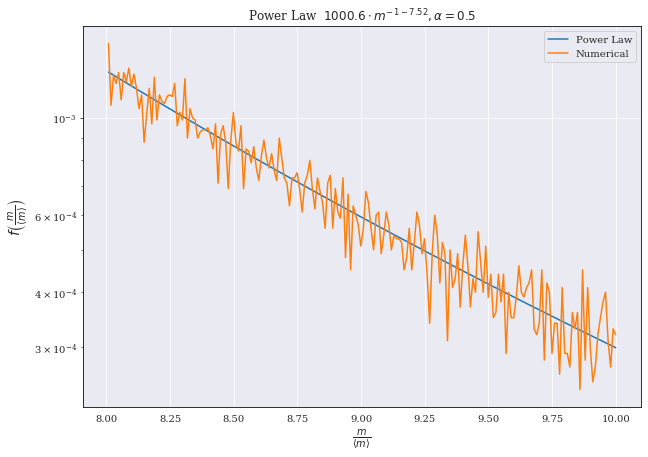

In [58]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[800:], powerlaw(binX, popt05[0], popt05[1])[800:], label = 'Power Law')
ax.semilogy(binX[800:], plotBins_1000_0_05[800:], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 0.5$" %(popt05[0],popt05[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


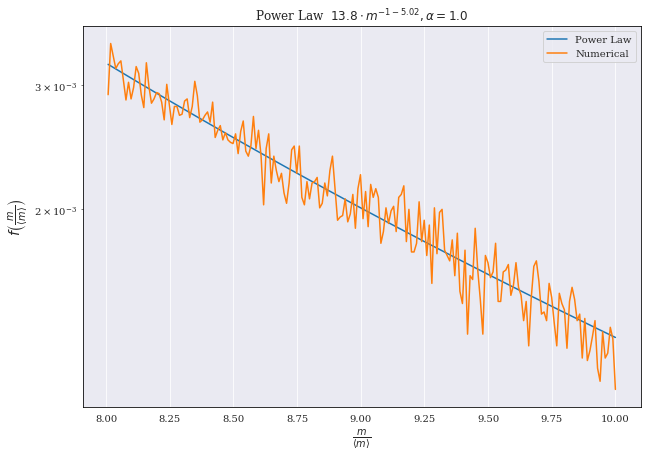

In [59]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[800:], powerlaw(binX, popt10[0], popt10[1])[800:], label = 'Power Law')
ax.semilogy(binX[800:], plotBins_1000_0_10[800:], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 1.0$" %(popt10[0],popt10[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


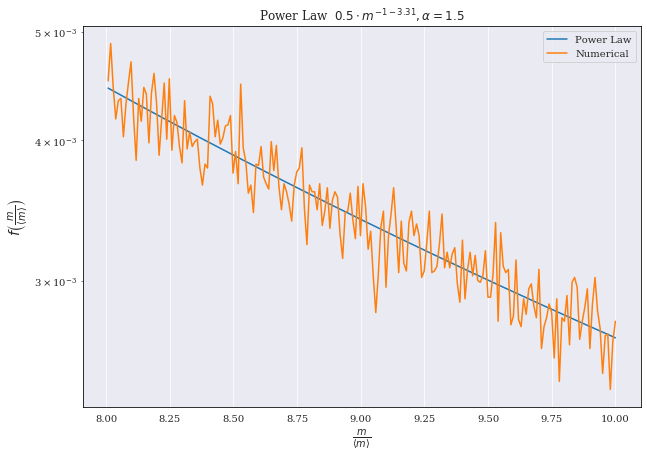

In [60]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[800:], powerlaw(binX, popt15[0], popt15[1])[800:], label = 'Power Law')
ax.semilogy(binX[800:], plotBins_1000_0_15[800:], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 1.5$" %(popt15[0],popt15[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


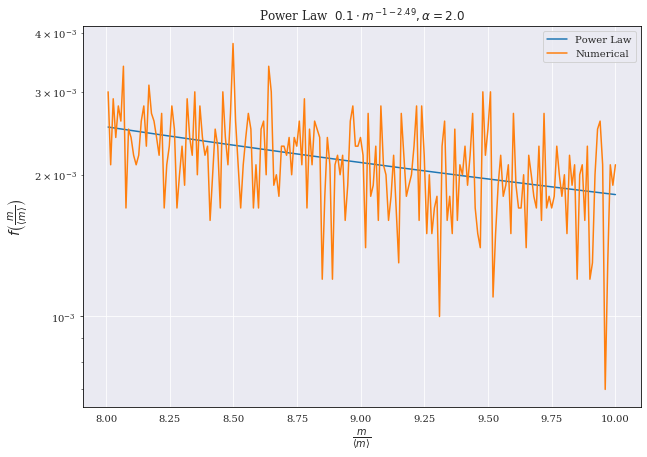

In [61]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[800:], powerlaw(binX, popt20[0], popt20[1])[800:], label = 'Power Law')
ax.semilogy(binX[800:], plotBins_1000_0_20[800:], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0$" %(popt20[0],popt20[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

# PART E

In [62]:
var_20_20 = np.load('parte_1000_0_20_20_TransVar.npz')
var_10_10 = np.load('parte_1000_0_10_10_TransVar.npz')
varPlot_20_20 = var_20_20['trans_variance']
varPlot_10_10 = var_10_10['trans_variance']

varSteps = np.arange(0, varPlot_20_20.shape[0])*100

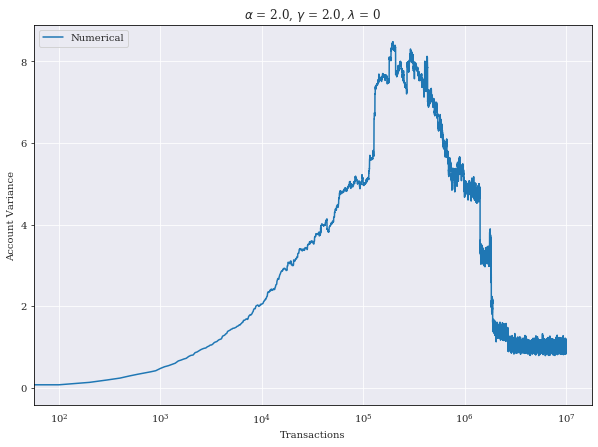

In [61]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, varPlot_20_20, label = 'Numerical')
ax.set_title(r'$\alpha$ = 2.0, $\gamma$ = 2.0, $\lambda$ = 0')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

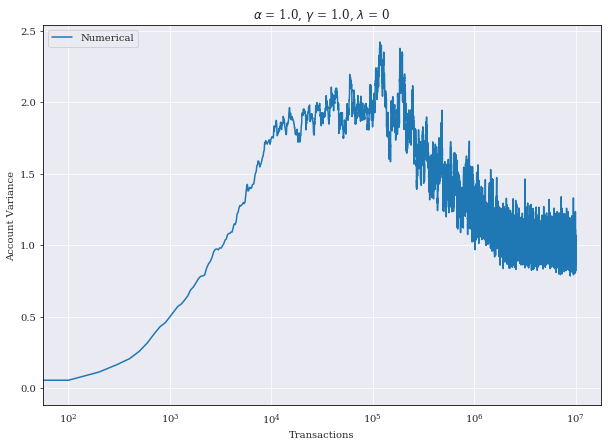

In [63]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, varPlot_10_10, label = 'Numerical')
ax.set_title(r'$\alpha$ = 1.0, $\gamma$ = 1.0, $\lambda$ = 0')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

In [35]:
binVals_1000_0_10_00 = np.load('parte_1000_0_10_00_BinVals.npz')
binVals_1000_0_10_10 = np.load('parte_1000_0_10_10_BinVals.npz')
binVals_1000_0_10_20 = np.load('parte_1000_0_10_20_BinVals.npz')
binVals_1000_0_10_30 = np.load('parte_1000_0_10_30_BinVals.npz')
binVals_1000_0_10_40 = np.load('parte_1000_0_10_40_BinVals.npz')

binVals_1000_0_20_00 = np.load('parte_1000_0_20_00_BinVals.npz')
binVals_1000_0_20_10 = np.load('parte_1000_0_20_10_BinVals.npz')
binVals_1000_0_20_20 = np.load('parte_1000_0_10_20_BinVals.npz')
binVals_1000_0_20_30 = np.load('parte_1000_0_10_30_BinVals.npz')
binVals_1000_0_20_40 = np.load('parte_1000_0_10_40_BinVals.npz')


binParams = np.load('parte_1000_0_10_10_BinParams.npz')

In [36]:
#had to increase transactions to 1e6. save time with mc= 1e3. not ideal but otherwise this would take 1000 years
#to run

mc_steps = 1e3
agents = 1000
m0 = 1000
binSize = binParams['binSize']
binX = binParams['binSteps']/m0

binCounts_1000_0_10_00 = binVals_1000_0_10_00['final_dist']
binCounts_1000_0_10_10 = binVals_1000_0_10_10['final_dist']
binCounts_1000_0_10_20 = binVals_1000_0_10_20['final_dist']
binCounts_1000_0_10_30 = binVals_1000_0_10_30['final_dist']
binCounts_1000_0_10_40 = binVals_1000_0_10_40['final_dist']

binCounts_1000_0_20_00 = binVals_1000_0_20_00['final_dist']
binCounts_1000_0_20_10 = binVals_1000_0_20_10['final_dist']
binCounts_1000_0_20_20 = binVals_1000_0_20_20['final_dist']
binCounts_1000_0_20_30 = binVals_1000_0_20_30['final_dist']
binCounts_1000_0_20_40 = binVals_1000_0_20_40['final_dist']
#binCounts_1000_0_10 = binVals_1000_0_10['final_dist']
#binCounts_1000_0_05 = binVals_1000_0_05['final_dist']
#errorVec_1000_0_20 = binVals_1000_0_20['error_vals']
#errorX_1000_0_20 = np.arange(0, mc_steps0)

plotBins_1000_0_10_00 = binCounts_1000_0_10_00/mc_steps/agents*m0/binSize
plotBins_1000_0_10_10 = binCounts_1000_0_10_10/mc_steps/agents*m0/binSize
plotBins_1000_0_10_20 = binCounts_1000_0_10_20/mc_steps/agents*m0/binSize
plotBins_1000_0_10_30 = binCounts_1000_0_10_30/mc_steps/agents*m0/binSize
plotBins_1000_0_10_40 = binCounts_1000_0_10_40/mc_steps/agents*m0/binSize

plotBins_1000_0_20_00 = binCounts_1000_0_20_00/mc_steps/agents*m0/binSize
plotBins_1000_0_20_10 = binCounts_1000_0_20_10/mc_steps/agents*m0/binSize
plotBins_1000_0_20_20 = binCounts_1000_0_20_20/mc_steps/agents*m0/binSize
plotBins_1000_0_20_30 = binCounts_1000_0_20_30/mc_steps/agents*m0/binSize
plotBins_1000_0_20_40 = binCounts_1000_0_20_40/mc_steps/agents*m0/binSize

In [33]:
print(plotBins_1000_0_10_00.shape)

(1000,)


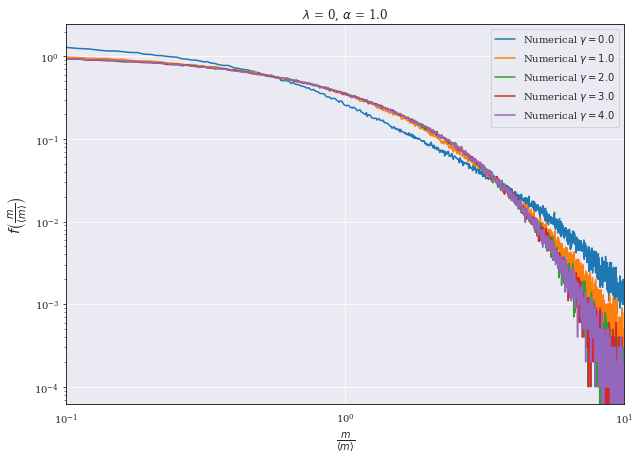

In [41]:
fig, ax = plt.subplots(figsize=(10,7))
ax.loglog(binX, plotBins_1000_0_10_00, label = r'Numerical $\gamma = 0.0$')
ax.loglog(binX, plotBins_1000_0_10_10, label = r'Numerical $\gamma = 1.0$')
ax.loglog(binX, plotBins_1000_0_10_20, label = r'Numerical $\gamma = 2.0$')
ax.loglog(binX, plotBins_1000_0_10_30, label = r'Numerical $\gamma = 3.0$')
ax.loglog(binX, plotBins_1000_0_10_40, label = r'Numerical $\gamma = 4.0$')
ax.set_title(r'$\lambda$ = 0, $\alpha$ = 1.0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.set_xlim(1e-1,1e1)

ax.legend(loc = 'upper right')
plt.show()

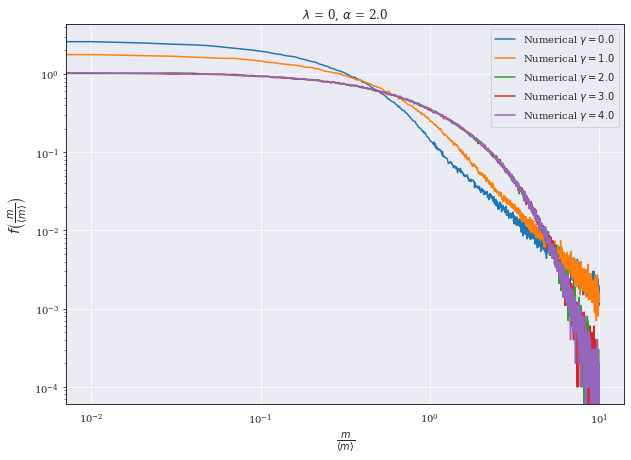

In [42]:
fig, ax = plt.subplots(figsize=(10,7))
ax.loglog(binX, plotBins_1000_0_20_00, label = r'Numerical $\gamma = 0.0$')
ax.loglog(binX, plotBins_1000_0_20_10, label = r'Numerical $\gamma = 1.0$')
ax.loglog(binX, plotBins_1000_0_20_20, label = r'Numerical $\gamma = 2.0$')
ax.loglog(binX, plotBins_1000_0_20_30, label = r'Numerical $\gamma = 3.0$')
ax.loglog(binX, plotBins_1000_0_20_40, label = r'Numerical $\gamma = 4.0$')
ax.set_title(r'$\lambda$ = 0, $\alpha$ = 2.0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
#ax.set_xlim(1e-1,1e1)

ax.legend(loc = 'upper right')
plt.show()

In [136]:
from scipy.optimize import curve_fit

def powerlaw( x, a, b):
    return a*x**(1-b)

popt10, pcov10 = curve_fit(powerlaw, binX[800:], plotBins_1000_0_20_10[800:])
popt20, pcov20 = curve_fit(powerlaw, binX[550:750], plotBins_1000_0_20_20[550:750])
popt30, pcov30 = curve_fit(powerlaw, binX[550:750], plotBins_1000_0_20_30[550:750])
popt40, pcov40 = curve_fit(powerlaw, binX[550:750], plotBins_1000_0_20_40[550:750])

err10 = np.sum((powerlaw(binX, popt10[0], popt10[1])[800:] - plotBins_1000_0_20_10[800:])**2)
err20 = np.sum((powerlaw(binX, popt20[0], popt20[1])[550:750] - plotBins_1000_0_20_20[550:750])**2)
err30 = np.sum((powerlaw(binX, popt30[0], popt30[1])[550:750] - plotBins_1000_0_20_30[550:750])**2)
err40 = np.sum((powerlaw(binX, popt40[0], popt40[1])[550:750] - plotBins_1000_0_20_40[550:750])**2)
print(err10)
print(err20)
print(err30)
print(err40)

3.752399586995437e-05
4.73662320170704e-05
3.4892835788542166e-05
4.160471063406693e-05


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


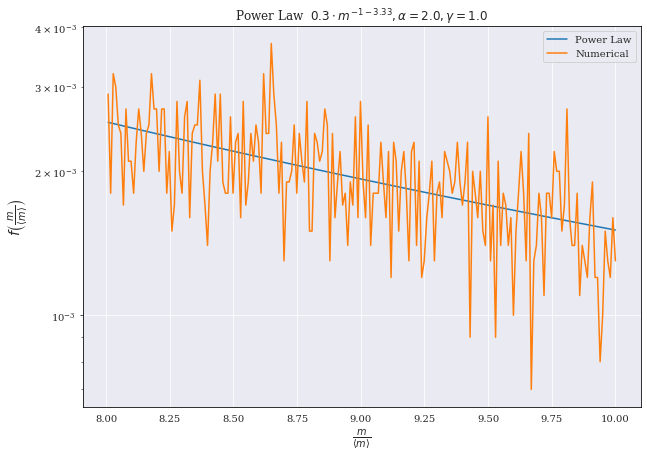

In [116]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[800:], powerlaw(binX, popt10[0], popt10[1])[800:], label = 'Power Law')
ax.semilogy(binX[800:], plotBins_1000_0_20_10[800:], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0, \gamma = 1.0$" %(popt10[0],popt10[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


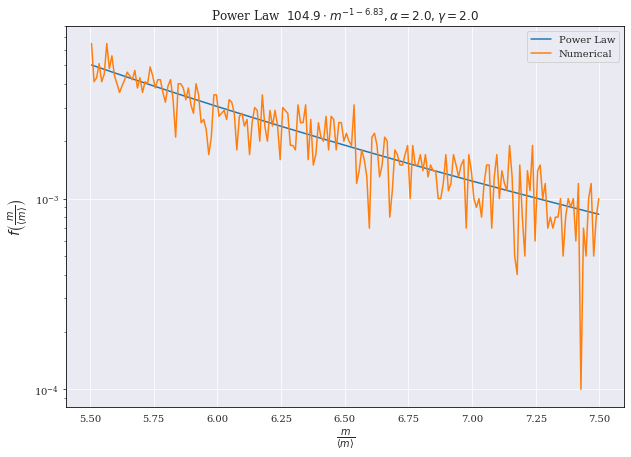

In [118]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[550:750], powerlaw(binX, popt20[0], popt20[1])[550:750], label = 'Power Law')
ax.semilogy(binX[550:750], plotBins_1000_0_20_20[550:750], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0, \gamma = 2.0$" %(popt20[0],popt20[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
#ax.set_ylim(1e-5,1e-3)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


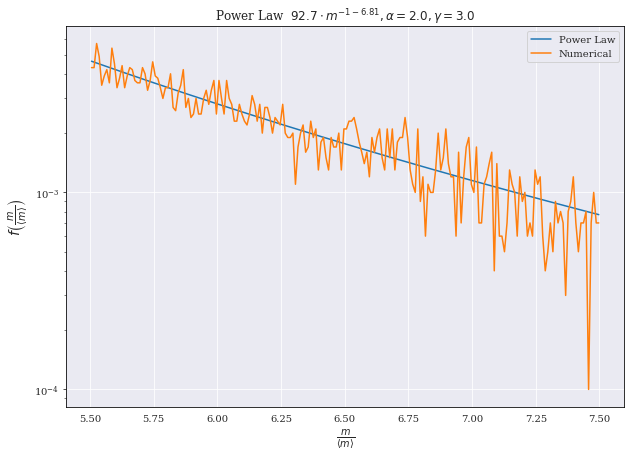

In [119]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[550:750], powerlaw(binX, popt30[0], popt30[1])[550:750], label = 'Power Law')
ax.semilogy(binX[550:750], plotBins_1000_0_20_30[550:750], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0, \gamma = 3.0$" %(popt30[0],popt30[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
#ax.set_ylim(1e-5,1e-3)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


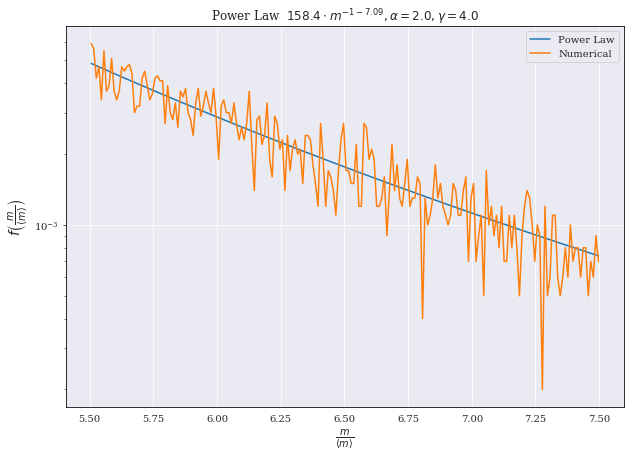

In [120]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[550:750], powerlaw(binX, popt40[0], popt40[1])[550:750], label = 'Power Law')
ax.semilogy(binX[550:750], plotBins_1000_0_20_40[550:750], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0, \gamma = 4.0$" %(popt40[0],popt40[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
#ax.set_ylim(1e-5,1e-3)

plt.show()

NOW WITH SAVING

In [89]:
binVals_1000_25_10_00 = np.load('parte_1000_25_10_00_BinVals.npz')
binVals_1000_25_10_10 = np.load('parte_1000_25_10_10_BinVals.npz')
binVals_1000_25_10_20 = np.load('parte_1000_25_10_20_BinVals.npz')
binVals_1000_25_10_30 = np.load('parte_1000_25_10_30_BinVals.npz')
binVals_1000_25_10_40 = np.load('parte_1000_25_10_40_BinVals.npz')

binVals_1000_25_20_00 = np.load('parte_1000_25_20_00_BinVals.npz')
binVals_1000_25_20_10 = np.load('parte_1000_25_20_10_BinVals.npz')
binVals_1000_25_20_20 = np.load('parte_1000_25_10_20_BinVals.npz')
binVals_1000_25_20_30 = np.load('parte_1000_25_10_30_BinVals.npz')
binVals_1000_25_20_40 = np.load('parte_1000_25_10_40_BinVals.npz')


binParams = np.load('parte_1000_25_10_00_BinParams.npz')

In [90]:
#had to increase transactions to 1e6. save time with mc= 1e3. not ideal but otherwise this would take 1000 years
#to run

mc_steps = 1e3
agents = 1000
m0 = 1000
binSize = binParams['binSize']
binX = binParams['binSteps']/m0

binCounts_1000_25_10_00 = binVals_1000_25_10_00['final_dist']
binCounts_1000_25_10_10 = binVals_1000_25_10_10['final_dist']
binCounts_1000_25_10_20 = binVals_1000_25_10_20['final_dist']
binCounts_1000_25_10_30 = binVals_1000_25_10_30['final_dist']
binCounts_1000_25_10_40 = binVals_1000_25_10_40['final_dist']

binCounts_1000_25_20_00 = binVals_1000_25_20_00['final_dist']
binCounts_1000_25_20_10 = binVals_1000_25_20_10['final_dist']
binCounts_1000_25_20_20 = binVals_1000_25_20_20['final_dist']
binCounts_1000_25_20_30 = binVals_1000_25_20_30['final_dist']
binCounts_1000_25_20_40 = binVals_1000_25_20_40['final_dist']

plotBins_1000_25_10_00 = binCounts_1000_25_10_00/mc_steps/agents*m0/binSize
plotBins_1000_25_10_10 = binCounts_1000_25_10_10/mc_steps/agents*m0/binSize
plotBins_1000_25_10_20 = binCounts_1000_25_10_20/mc_steps/agents*m0/binSize
plotBins_1000_25_10_30 = binCounts_1000_25_10_30/mc_steps/agents*m0/binSize
plotBins_1000_25_10_40 = binCounts_1000_25_10_40/mc_steps/agents*m0/binSize

plotBins_1000_25_20_00 = binCounts_1000_25_20_00/mc_steps/agents*m0/binSize
plotBins_1000_25_20_10 = binCounts_1000_25_20_10/mc_steps/agents*m0/binSize
plotBins_1000_25_20_20 = binCounts_1000_25_20_20/mc_steps/agents*m0/binSize
plotBins_1000_25_20_30 = binCounts_1000_25_20_30/mc_steps/agents*m0/binSize
plotBins_1000_25_20_40 = binCounts_1000_25_20_40/mc_steps/agents*m0/binSize

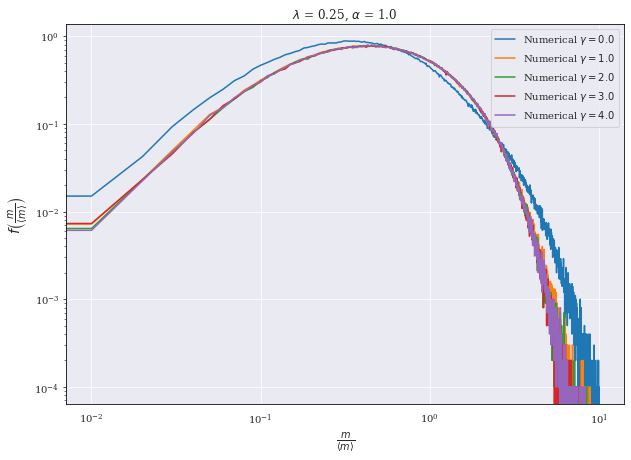

In [66]:
fig, ax = plt.subplots(figsize=(10,7))
ax.loglog(binX, plotBins_1000_25_10_00, label = r'Numerical $\gamma = 0.0$')
ax.loglog(binX, plotBins_1000_25_10_10, label = r'Numerical $\gamma = 1.0$')
ax.loglog(binX, plotBins_1000_25_10_20, label = r'Numerical $\gamma = 2.0$')
ax.loglog(binX, plotBins_1000_25_10_30, label = r'Numerical $\gamma = 3.0$')
ax.loglog(binX, plotBins_1000_25_10_40, label = r'Numerical $\gamma = 4.0$')
ax.set_title(r'$\lambda$ = 0.25, $\alpha$ = 1.0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
#ax.set_xlim(1e-1,1e1)

ax.legend(loc = 'upper right')
plt.show()

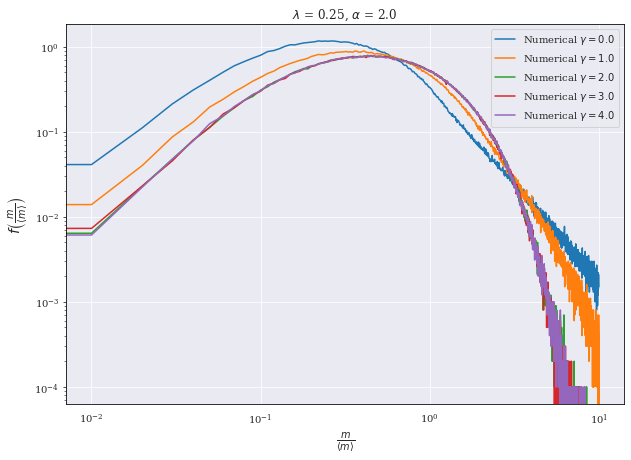

In [92]:
fig, ax = plt.subplots(figsize=(10,7))
ax.loglog(binX, plotBins_1000_25_20_00, label = r'Numerical $\gamma = 0.0$')
ax.loglog(binX, plotBins_1000_25_20_10, label = r'Numerical $\gamma = 1.0$')
ax.loglog(binX, plotBins_1000_25_20_20, label = r'Numerical $\gamma = 2.0$')
ax.loglog(binX, plotBins_1000_25_20_30, label = r'Numerical $\gamma = 3.0$')
ax.loglog(binX, plotBins_1000_25_20_40, label = r'Numerical $\gamma = 4.0$')
ax.set_title(r'$\lambda$ = 0.25, $\alpha$ = 2.0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
#ax.set_xlim(1e-1,1e1)

ax.legend(loc = 'upper right')
plt.show()

In [135]:
from scipy.optimize import curve_fit


def powerlaw( x, a, b):
    return a*x**(1-b)

popt10, pcov10 = curve_fit(powerlaw, binX[800:960], plotBins_1000_25_20_10[800:960])
popt20, pcov20 = curve_fit(powerlaw, binX[400:550], plotBins_1000_25_20_20[400:550])
popt30, pcov30 = curve_fit(powerlaw, binX[400:550], plotBins_1000_25_20_30[400:550])
popt40, pcov40 = curve_fit(powerlaw, binX[400:550], plotBins_1000_25_20_40[400:550])

err10 = np.sum((powerlaw(binX, popt10[0], popt10[1])[800:960] - plotBins_1000_25_20_10[800:960])**2)
err20 = np.sum((powerlaw(binX, popt20[0], popt20[1])[800:960] - plotBins_1000_25_20_20[800:960])**2)
err30 = np.sum((powerlaw(binX, popt30[0], popt30[1])[800:960] - plotBins_1000_25_20_30[800:960])**2)
err40 = np.sum((powerlaw(binX, popt40[0], popt40[1])[800:960] - plotBins_1000_25_20_40[800:960])**2)
print(err10)
print(err20)
print(err30)
print(err40)

8.583820640425862e-06
3.7270375441756216e-08
3.430974089336595e-08
5.0746442040977844e-08


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


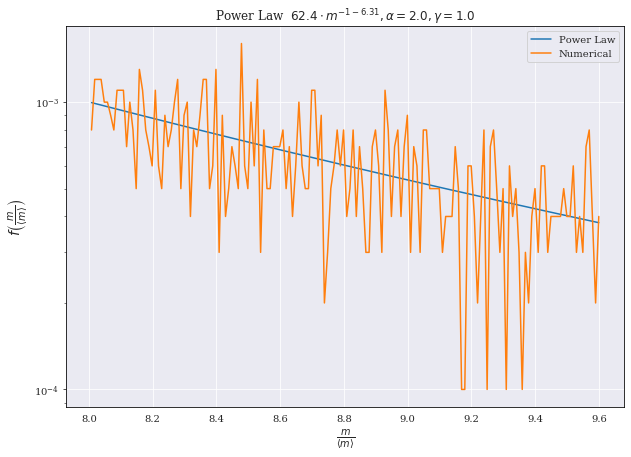

In [124]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[800:960], powerlaw(binX, popt10[0], popt10[1])[800:960], label = 'Power Law')
ax.semilogy(binX[800:960], plotBins_1000_25_20_10[800:960], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0, \gamma = 1.0$" %(popt10[0],popt10[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
#ax.set_ylim(1e-6, 5*1e-3)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


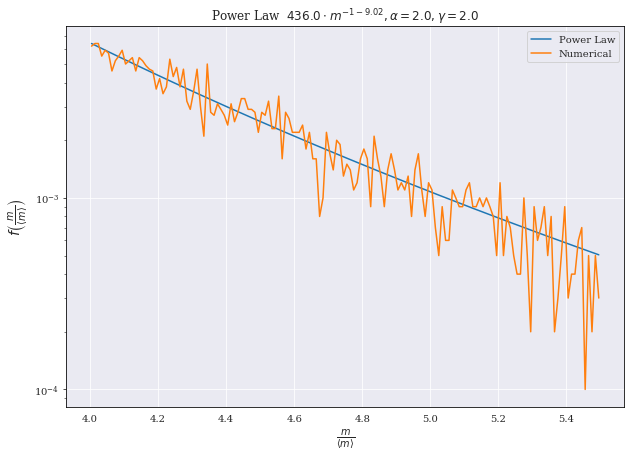

In [127]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[400:550], powerlaw(binX, popt20[0], popt20[1])[400:550], label = 'Power Law')
ax.semilogy(binX[400:550], plotBins_1000_25_20_20[400:550], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0, \gamma = 2.0$" %(popt20[0],popt20[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
#ax.set_ylim(1e-6, 5*1e-3)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


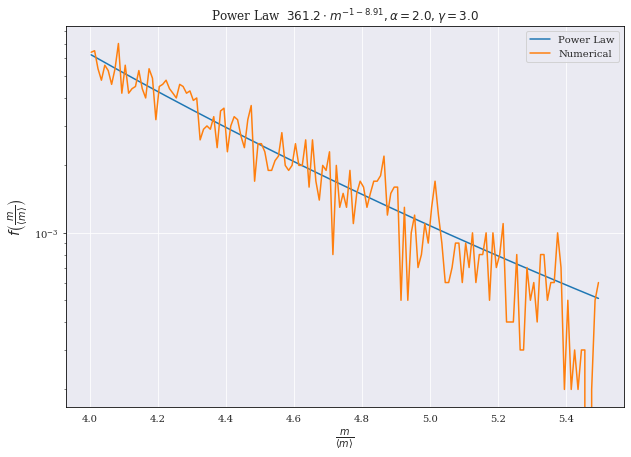

In [128]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[400:550], powerlaw(binX, popt30[0], popt30[1])[400:550], label = 'Power Law')
ax.semilogy(binX[400:550], plotBins_1000_25_20_30[400:550], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0, \gamma = 3.0$" %(popt30[0],popt30[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
#ax.set_ylim(1e-6, 5*1e-3)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


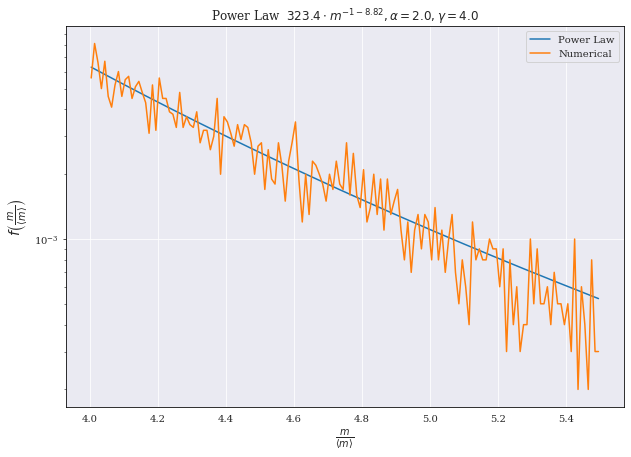

In [129]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[400:550], powerlaw(binX, popt40[0], popt40[1])[400:550], label = 'Power Law')
ax.semilogy(binX[400:550], plotBins_1000_25_20_40[400:550], label = 'Numerical')
ax.set_title(r"Power Law  $%.1f \cdot m^{-1-%.2f}, \alpha = 2.0, \gamma = 4.0$" %(popt40[0],popt40[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
#ax.set_ylim(1e-6, 5*1e-3)
plt.show()